# INTRODUCTION

- We have been given a dataset containing various information on 41,118 customers based on "Bank Marketing". 
The goal of this problem is to build a predictive model to predict whether a bank customer will subscribe
to a term deposit or not. 
 This report gives an account of the steps and techniques used in the different stages. 

- We will explore predictive models such as Logistic Regression, K- Nearest Neighbor, Decision Tree, and Random Forest

- First, we import libraries to open the given csv file.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

- open the csv file while creating a dataframe

In [2]:
#open the csv file in a dataFrame
df_bankdata = pd.read_csv("bank_data.csv")

- I have named the DataFrame created as df_bankdata

In [3]:
df_bankdata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- The given dataset contains 41,188 rows or customer records and 21 columns/ variables (information on each customer)

In [4]:
#Explore the features of the dataset

In [5]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

- The information above shows some data types as object; these will be converted to category to ensure data accuracy.
Float type data will also be chnaged integer. All these inconsistencies will be regularised in the cleaning stage.

In [6]:
df_bankdata.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

- The above information reveals 6 columns (job, marital, education, default, housing and loan) have some missing values.

In [7]:
df_bankdata.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

- The nunique method shed more light on the number of unique attributes in each variable. 

In [8]:
#Generate profile report to explore and see correlations of our data before cleaning 
from pandas_profiling import ProfileReport
 
#title parameter for naming our report, and explorative parameter set to True for Deeper exploration.
profile = ProfileReport(df_bankdata, title='Bank Data Pandas Profiling Report', explorative = True)

In [9]:
#profile

In [10]:
# Let us explore the data to discover inconsistencies
unique_age = df_bankdata['age'].unique()
unique_job = df_bankdata['job'].unique()
unique_marital = df_bankdata['marital'].unique()
unique_education = df_bankdata['education'].unique()
unique_default = df_bankdata['default'].unique()
unique_housing = df_bankdata['housing'].unique()
unique_loan = df_bankdata['loan'].unique()
unique_contact = df_bankdata['contact'].unique()
unique_month = df_bankdata['month'].unique()
unique_day_of_week = df_bankdata['day_of_week'].unique()
unique_duration = df_bankdata['duration'].unique()
unique_campaign = df_bankdata['campaign'].unique()
unique_pdays = df_bankdata['pdays'].unique()
unique_previous = df_bankdata['previous'].unique()
unique_poutcome = df_bankdata['poutcome'].unique()
unique_empvarrate = df_bankdata['emp.var.rate'].unique()
unique_conspriceidx = df_bankdata['cons.price.idx'].unique()
unique_consconfidx = df_bankdata['cons.conf.idx'].unique()
unique_euribor3m = df_bankdata['euribor3m'].unique()
unique_nremployed = df_bankdata['nr.employed'].unique()
unique_y = df_bankdata['y'].unique()

In [11]:
print(unique_age)

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


In [12]:
print(unique_job)


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']


In [13]:
print(unique_marital) 


['married' 'single' 'divorced' nan]


In [14]:
print(unique_education)


['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']


In [15]:
print(unique_default)


['no' nan 'yes']


In [16]:
print(unique_housing) 


['no' 'yes' nan]


In [17]:
print(unique_loan) 


['no' 'yes' nan]


In [18]:
print(unique_contact) 


['telephone' 'cellular']


In [19]:
print(unique_month)


['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [20]:
print(unique_day_of_week)


['mon' 'tue' 'wed' 'thu' 'fri']


In [21]:
print(unique_duration)


[ 261  149  226 ... 1246 1556 1868]


In [22]:
print(unique_campaign)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


In [23]:
print(unique_pdays) 


[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [24]:
print(unique_previous) 


[0 1 2 3 4 5 6 7]


In [25]:
print(unique_poutcome) 


['nonexistent' 'failure' 'success']


In [26]:
print(unique_empvarrate) 


[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


In [27]:
print(unique_conspriceidx)


[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]


In [28]:
print(unique_consconfidx)


[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]


In [29]:
print(unique_euribor3m)


[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0.884 0.883 0.881 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843
 0.838 0.834 0.829 0.825 0.821 0.819 0.813 0.809 0.803 

In [30]:
print(unique_nremployed)

[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]


In [31]:
print(unique_y)

['no' 'yes']


In [32]:
df_bankdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The above are features of the numerical variables only

- The bank data is unusable in its given form hence we shall clean to get rid of errors and inconsistencies; 
The isnull method revealed missing data under 6 columns:  job, marital, education, default, housing, and loan 
which will all be cleaned next.


# Data Cleaning - job

In [33]:
#Check the missing values under job
df_bankdata[pd.isna(df_bankdata["job"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,NaN,married,basic.4y,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,NaN,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,NaN,divorced,high.school,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,59,NaN,married,NaN,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,NaN,married,NaN,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,NaN,divorced,NaN,NaN,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes
41005,63,NaN,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no


In [34]:
#Mode of the job column
df_bankdata.loc[:,"job"].mode()


0    admin.
dtype: object

- Considering the 11 different unique job types and large size of the dataset, the mode (admin.) 
of the job will be used to fill the missing values. I will also change data type from object to category.

In [35]:
#change data type to category
df_bankdata.job = df_bankdata.job.astype("category")

In [36]:
# Use the mode to fill missing job column
df_bankdata['job'].fillna(df_bankdata['job'].mode()[0], inplace=True)

In [37]:
#Check cleaned data for column "job"
df_bankdata[pd.isna(df_bankdata["job"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Data Cleaning - marital

In [38]:
#Check the missing values under marital
df_bankdata[pd.isna(df_bankdata["marital"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,NaN,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,NaN,university.degree,NaN,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,NaN,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,NaN,high.school,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,admin.,NaN,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,NaN,university.degree,no,no,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,NaN,university.degree,no,yes,no,telephone,oct,thu,...,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,...,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,...,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


- 80 customers had marital status recorded as nan. 
As we have only 3 unique types under marital, the backward fill will be used to replace the missing values.

In [39]:
df_bankdata.marital.fillna(method = "bfill", inplace = True)

In [40]:
#change data type to category
df_bankdata.marital = df_bankdata.marital.astype("category")

In [41]:
#Check cleaned data for marital
df_bankdata[pd.isna(df_bankdata["marital"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Data Cleaning - education

In [42]:
#Check the missing values in column "education"
df_bankdata[pd.isna(df_bankdata["education"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,NaN,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,NaN,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,NaN,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,NaN,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


- The “education” column was identified to have 1731 missing values.
Since we have 7 unique types under education, the mode will be used to replace missing data.

In [43]:
#Mode of the education column
df_bankdata.loc[:,"education"].mode()


0    university.degree
dtype: object

- education has Object data type. This will be changed to category

In [44]:
#change data type to category
df_bankdata.education = df_bankdata.education.astype("category")

In [45]:
# Use the mode to fill missing education column
df_bankdata['education'].fillna(df_bankdata['education'].mode()[0], inplace=True)

- university.degree, the mode of the column "education" was used to fill the missing values.

In [46]:
#Check cleaned data for column "education"
df_bankdata[pd.isna(df_bankdata["education"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Data Cleaning - default

In [47]:
#Check the missing values in column "default"
df_bankdata[pd.isna(df_bankdata["default"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,university.degree,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,NaN,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,70,retired,married,basic.4y,NaN,no,no,cellular,oct,thu,...,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
40940,49,admin.,married,high.school,NaN,no,no,cellular,oct,wed,...,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40941,66,retired,married,basic.4y,NaN,NaN,NaN,cellular,oct,wed,...,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40969,84,retired,divorced,basic.4y,NaN,yes,no,cellular,oct,fri,...,4,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no


- The “default” column was identified to have 8597 missing values.
Since we have only 2 unique types under default, the backward fill will be used to replace the missing values. 

In [48]:
#Use the backward fill method to replace missing values in the column "default"
df_bankdata.default.fillna(method = "bfill", inplace = True)

In [49]:
#change data type to category
df_bankdata.default = df_bankdata.default.astype("category")

In [50]:
#Check cleaned data for column "default"
df_bankdata[pd.isna(df_bankdata["default"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Data Cleaning - housing

In [51]:
#Check the missing values in column "housing"
df_bankdata[pd.isna(df_bankdata["housing"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,admin.,married,university.degree,no,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,no,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,no,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,no,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,NaN,NaN,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,NaN,NaN,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,NaN,NaN,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,NaN,NaN,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


- The “housing” column was identified to have 990 missing values. 
As we have identified only 2 unique types under housing, we shall adopt the backward fill to replace the missing values.

In [52]:
#Use the backward fill method to replace missing values in the column "housing"
df_bankdata.housing.fillna(method = "bfill", inplace = True)

In [53]:
#change data type to category
df_bankdata.housing = df_bankdata.housing.astype("category")

In [54]:
#Check cleaned data for column "housing"
df_bankdata[pd.isna(df_bankdata["housing"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Data Cleaning - loan

In [55]:
#Check the missing values in column "loan"
df_bankdata[pd.isna(df_bankdata["loan"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,admin.,married,university.degree,no,no,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,no,no,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,no,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,no,no,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,no,yes,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,yes,NaN,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,yes,NaN,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,yes,NaN,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,no,NaN,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


- The “loan” column was identified to have 990 missing values, having identified only 2 unique types under the loan,
the backward fill will be used to replace the missing values. 
 

In [56]:
#Use the backward fill method to replace missing values in the column "loan"
df_bankdata.loan.fillna(method = "bfill", inplace = True)

In [57]:
#change data type to category
df_bankdata.loan = df_bankdata.loan.astype("category")

In [58]:
#Check cleaned data for column "loan"
df_bankdata[pd.isna(df_bankdata["loan"])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


# Data Cleaning - Contact

In [59]:
#Check data type of Contact
df_bankdata["contact"].dtypes
#print(df_bankdata["contact"]).dtypes

dtype('O')

- Contact has Object data type. This will be changed to category

In [60]:
#change data type to category
df_bankdata.contact = df_bankdata.contact.astype("category")

# Data Cleaning - Month

In [61]:
#Check data type of Month
df_bankdata["month"].dtypes

dtype('O')

- Month has Object data type. This will be changed to category

In [62]:
#change data type to category
df_bankdata.month = df_bankdata.month.astype("category")

# Data Cleaning - Day of week

In [63]:
#Check data type of "day_of_week"
df_bankdata["day_of_week"].dtypes

dtype('O')

- Day_of_the_week has Object data type. This will be changed to category

In [64]:
#change data type to category
df_bankdata.day_of_week = df_bankdata.day_of_week.astype("category")

# Data Cleaning - Duration

In [65]:
#Check data type of "duration"
df_bankdata["duration"].dtypes

dtype('int64')

- Duration is integer type, requires no change.

# Data Cleaning - Campaign

In [66]:
#Check data type of "campaign"
df_bankdata["campaign"].dtypes

dtype('int64')

- Campaign is integer type which is the desired.

# Data Cleaning - pdays

In [67]:
#Check data type of "pdays"
df_bankdata["pdays"].dtypes

dtype('int64')

- pdays is integer type which is the desired.

# Data Cleaning - previous

In [68]:
#Check data type of "previous"
df_bankdata["previous"].dtypes

dtype('int64')

- "previous" is integer which is the desired type.

# Data Cleaning - poutcome

In [69]:
#Check data type of "poutcome"
df_bankdata["poutcome"].dtypes

dtype('O')

- poutcome has Object data type. This will be changed to category

In [70]:
#change data type to category
df_bankdata.poutcome = df_bankdata.poutcome.astype("category")

# Data Cleaning - emp.var.rate

In [71]:
#Check data type of "empvarrate"
df_bankdata["emp.var.rate"].dtypes

dtype('float64')

- The float data type will be addressed in the later section

# Data Cleaning - cons.price.idx

In [72]:
#Check data type of "conspriceidx"
df_bankdata["cons.price.idx"].dtypes

dtype('float64')

- The float data type will be converted to integer in the next section.

# Data Cleaning - consconfidx

In [73]:
#Check data type of "consconfidx"
df_bankdata["cons.conf.idx"].dtypes

dtype('float64')

- The float data type will be converted to integer in the next section.

# Data Cleaning - euribor3m

In [74]:
#Check data type of "euribor3m"
df_bankdata["euribor3m"].dtypes

dtype('float64')

- The float data type will be changed to integer in the next section.

# Data Cleaning - nr.employed

In [75]:
#Check data type of "nr.employed"
df_bankdata["nr.employed"].dtypes

dtype('float64')

- The float type will be converted to integer in the next section.

# Data Cleaning - "y"

In [76]:
#Check data type of "y"
df_bankdata["y"].dtypes

dtype('O')

- "y" has Object data type. This will be changed to category

In [77]:
#change data type to category
df_bankdata.y = df_bankdata.y.astype("category")

In [78]:
print(df_bankdata.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


- All missing values have now been filled

# Data Visualisation

- We shall use some visualisation to throw more light on our dataset.

In [79]:
# I will install plotly to enable me import plotly.express
#!pip install plotly

In [80]:
#Load some visualisation libraries. 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
%matplotlib inline

- 1. Age

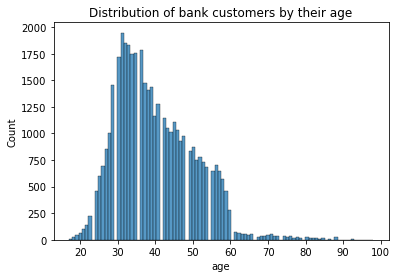

In [81]:
sns.histplot(x = 'age', data = df_bankdata)
plt.title("Distribution of bank customers by their age")
plt.show()

- We can deduce from the plot that the larger number of the customers are aged between 29 and 38 years old.

- 2.Job

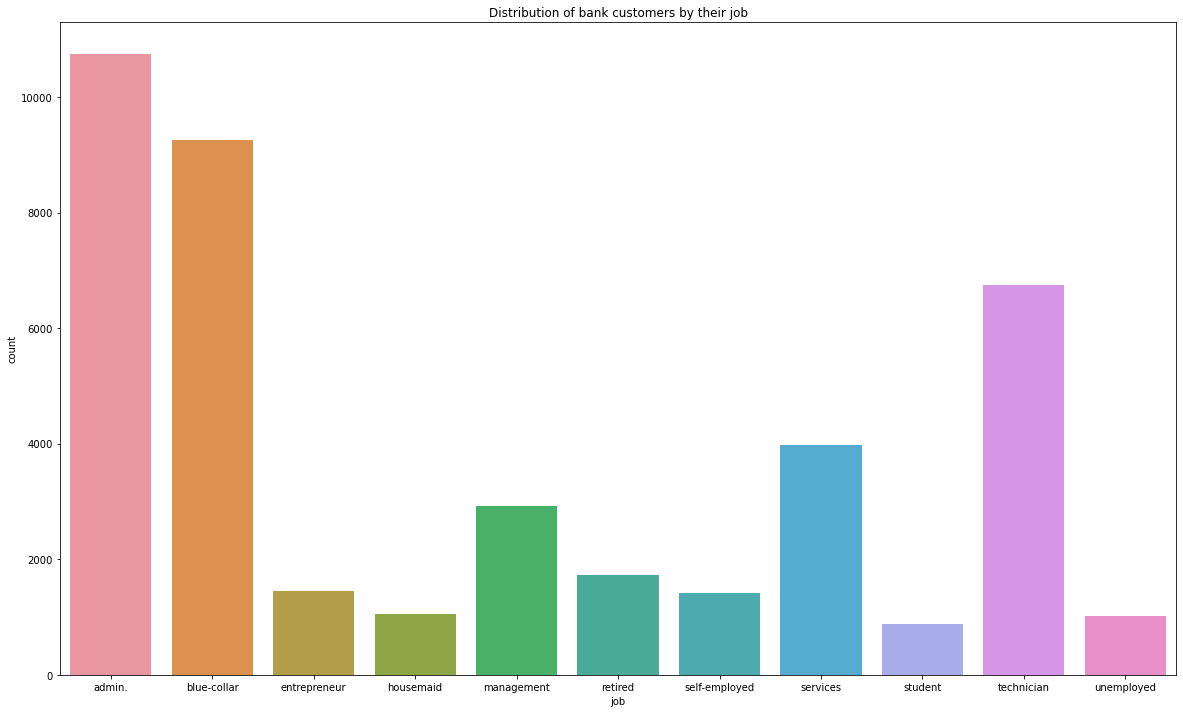

In [82]:
plt.figure(figsize = (20,12))
g = sns.countplot(x = "job", data = df_bankdata)
#g.set_xticklabels(labels = df_bankdata["job"], rotation = 90)
plt.title("Distribution of bank customers by their job")
plt.show()

- We can infer that individuals employed as admin, technicians and those in blue-collar jobs
account for the larger number of the bank customers.

- 3. Marital

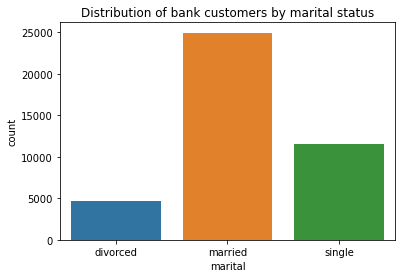

In [83]:
sns.countplot(x = "marital", data = df_bankdata)
plt.title("Distribution of bank customers by marital status")
plt.show()

- It is obvious from the above that majority of the customers are married.

- 4.Education

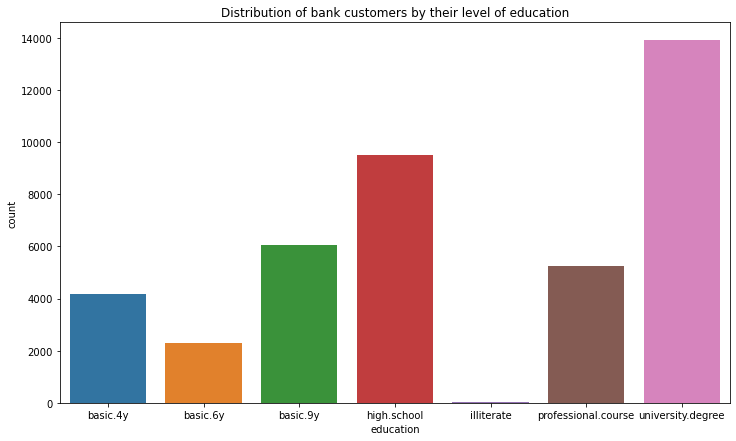

In [84]:
plt.figure(figsize = (12,7))
sns.countplot(x = "education", data = df_bankdata)
plt.title("Distribution of bank customers by their level of education")
plt.show()

- It is obvious from the above that majority of the bank customers are university degree holders and 
high school graduates.

- 5. Housing

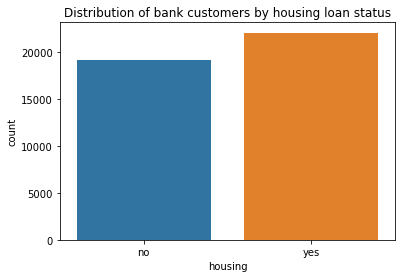

In [85]:
sns.countplot(x = "housing", data = df_bankdata)
plt.title("Distribution of bank customers by housing loan status")
plt.show()

- We can infer from the above distribution that there are 2,500 more customers on housing loan
than those not on housing loan.

- 6. Loan

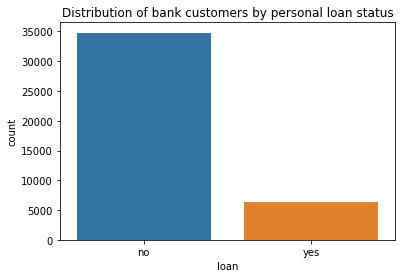

In [86]:
sns.countplot(x = "loan", data = df_bankdata)
plt.title("Distribution of bank customers by personal loan status")
plt.show()

- It appears that the estimated ratio of customers running on personal loan to those not on personal loan is 1:7

- We shall also examine the relationship between some individual variables and the target variable.

- (I) Marital vs Target

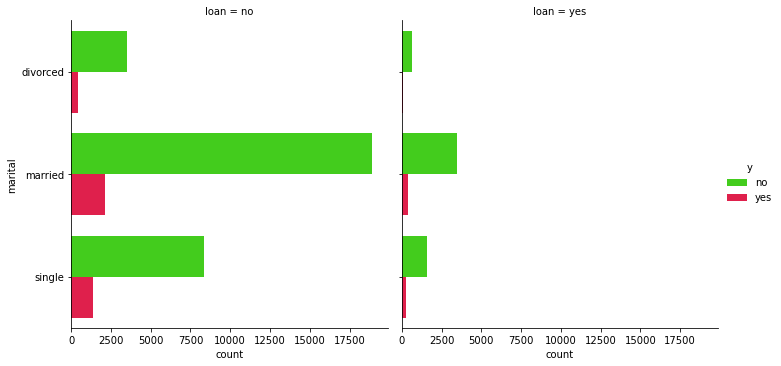

In [87]:
sns.catplot(y="marital", hue="y", data = df_bankdata, kind = "count", palette = "prism", col = "loan")
plt.show()

- It is obvious from the plot that married customers who have personal loans running are mostly averse
to the term deposit subscription.

- (II) Education vs Target

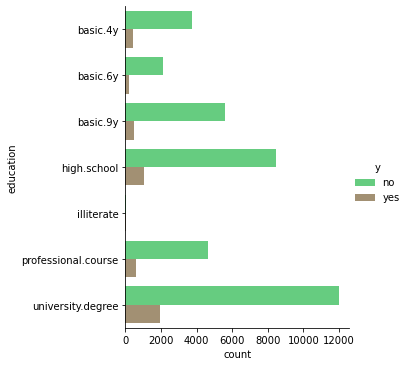

In [88]:
sns.catplot(y="education",hue = "y", data = df_bankdata, kind = "count", palette="terrain")
plt.show()

- We can deduce from the plot that customers with university degree and high school graduates are 
not inclined to the term deposit.

# Data Manipulation - Categorical to Numeric

- As machine learning models and preditive analysis cannot be built with data in raw form without being skewed,
I will proceed to convert categorical variables to numeric using the label encoder.

In [89]:
#Use Label Encoder to convert categorical variables to numerical
df_bankdata_sklearn = df_bankdata

lb_make = LabelEncoder()
df_bankdata_sklearn['job'] = lb_make.fit_transform(df_bankdata['job'])
df_bankdata_sklearn['marital'] = lb_make.fit_transform(df_bankdata['marital'])
df_bankdata_sklearn['education'] = lb_make.fit_transform(df_bankdata['education'])
df_bankdata_sklearn['default'] = lb_make.fit_transform(df_bankdata['default'])
df_bankdata_sklearn['housing'] = lb_make.fit_transform(df_bankdata['housing'])
df_bankdata_sklearn['loan'] = lb_make.fit_transform(df_bankdata['loan'])
df_bankdata_sklearn['contact'] = lb_make.fit_transform(df_bankdata['contact'])
df_bankdata_sklearn['month'] = lb_make.fit_transform(df_bankdata['month'])
df_bankdata_sklearn['day_of_week'] = lb_make.fit_transform(df_bankdata['day_of_week'])
df_bankdata_sklearn['poutcome'] = lb_make.fit_transform(df_bankdata['poutcome'])
df_bankdata_sklearn['y'] = lb_make.fit_transform(df_bankdata['y'])

df_bankdata_sklearn.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


- All categorical elements in the data have been converted to numerical and assigned values

In [90]:
#round off variables in float and convert to integer

df_bankdata['emp.var.rate'] = df_bankdata['emp.var.rate'].apply(np.int64)
df_bankdata['cons.price.idx'] = df_bankdata['cons.price.idx'].apply(np.int64)
df_bankdata['cons.conf.idx'] = df_bankdata['cons.conf.idx'].apply(np.int64)
df_bankdata['euribor3m'] = df_bankdata['euribor3m'].apply(np.int64)
df_bankdata['nr.employed'] = df_bankdata['nr.employed'].apply(np.int64)

print(df_bankdata.dtypes)

age               int64
job               int32
marital           int32
education         int32
default           int32
housing           int32
loan              int32
contact           int32
month             int32
day_of_week       int32
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome          int32
emp.var.rate      int64
cons.price.idx    int64
cons.conf.idx     int64
euribor3m         int64
nr.employed       int64
y                 int32
dtype: object


- All float types values in the dataset have now been converted to integers

In [91]:
#Generate profile report to explore and see correlations of the dataset after data cleaning and manipulation
from pandas_profiling import ProfileReport
 
#title parameter for naming our report, and explorative parameter set to True for Deeper exploration.
profile = ProfileReport(df_bankdata, title='Bank Data Pandas Profiling Report', explorative = True)

In [92]:
#profile

In [93]:
#check data correlation
df_bankdata.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.011933,-0.393143,-0.127723,0.001891,-0.002524,-0.006611,0.007021,-0.024877,-0.017572,...,0.004594,-0.034369,0.024365,0.019750,-0.016576,0.045492,0.127883,0.001021,-0.017917,0.030399
job,-0.011933,1.000000,0.025536,0.131869,0.013698,0.008188,-0.011454,-0.031929,-0.033206,-0.004111,...,-0.007736,-0.025673,0.022154,0.006660,-0.019348,0.009410,0.042169,-0.016282,-0.021956,0.025482
marital,-0.393143,0.025536,1.000000,0.111911,-0.002393,0.010703,0.006089,-0.055221,-0.008971,0.002122,...,-0.009337,-0.037828,0.037840,0.002741,-0.082502,-0.057459,-0.033680,-0.094205,-0.086053,0.046374
education,-0.127723,0.131869,0.111911,1.000000,0.002576,0.018961,0.009813,-0.110515,-0.084505,-0.016828,...,0.000172,-0.045742,0.037680,0.016786,-0.058085,-0.012425,0.072389,-0.037836,-0.040817,0.057268
default,0.001891,0.013698,-0.002393,0.002576,1.000000,-0.003453,-0.003660,-0.006474,-0.004528,0.006079,...,-0.003803,0.001668,0.002766,-0.006196,0.003914,0.001120,0.003878,0.005875,0.005918,-0.003041
housing,-0.002524,0.008188,0.010703,0.018961,-0.003453,1.000000,0.047260,-0.082952,-0.018749,0.003912,...,-0.009548,-0.010192,0.021710,-0.012255,-0.060501,-0.061336,-0.039950,-0.053793,-0.046572,0.010776
loan,-0.006611,-0.011454,0.006089,0.009813,-0.003660,0.047260,1.000000,-0.012562,-0.006307,-0.009616,...,0.004113,-0.000600,0.000028,-0.001610,0.000807,-0.008498,-0.014257,-0.001018,0.002974,-0.004637
contact,0.007021,-0.031929,-0.055221,-0.110515,-0.006474,-0.082952,-0.012562,1.000000,0.276565,-0.009575,...,0.077368,0.117970,-0.212848,0.118744,0.413065,0.428343,0.271665,0.374529,0.269908,-0.144773
month,-0.024877,-0.033206,-0.008971,-0.084505,-0.004528,-0.018749,-0.006307,0.276565,1.000000,0.027677,...,-0.062059,-0.047891,0.103157,-0.065012,-0.172841,-0.189731,0.010598,-0.049698,-0.222281,-0.006065
day_of_week,-0.017572,-0.004111,0.002122,-0.016828,0.006079,0.003912,-0.009616,-0.009575,0.027677,1.000000,...,-0.038288,-0.009531,-0.004102,0.018732,0.029031,-0.018670,0.041754,0.036966,0.028317,0.015967


- The correlation above reveals a very high relationship between the variable "duration" and the target variable "y".
This is obviously because at the end of each call, the customer's decision either to subscribe to a term deposit
or not becomes known. Therefore, I will drop the column "duration" to achieve a realistic predictive model.

In [94]:
#drop the duration column

df_bankdata.drop(columns = "duration", inplace = True)

In [95]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null int32
marital           41188 non-null int32
education         41188 non-null int32
default           41188 non-null int32
housing           41188 non-null int32
loan              41188 non-null int32
contact           41188 non-null int32
month             41188 non-null int32
day_of_week       41188 non-null int32
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int32
emp.var.rate      41188 non-null int64
cons.price.idx    41188 non-null int64
cons.conf.idx     41188 non-null int64
euribor3m         41188 non-null int64
nr.employed       41188 non-null int64
y                 41188 non-null int32
dtypes: int32(11), int64(9)
memory usage: 4.6 MB


In [96]:
#Confirm manipulated data
df_bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0


In [97]:
#check statistical features
df_bankdata.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.636448,1.169418,3.705157,0.000073,0.535132,0.155361,0.365252,4.230868,2.004613,2.567593,962.475454,0.172963,0.930101,0.154171,92.922065,-40.116612,2.922453,5166.849446,0.112654
std,10.42125,3.549668,0.604244,2.081202,0.008534,0.498770,0.362253,0.481507,2.320025,1.397575,2.770014,186.910907,0.494901,0.362886,1.117657,0.593828,4.657969,1.565326,72.328375,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.000000,92.000000,-50.000000,0.000000,4963.000000,0.000000
25%,32.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,1.000000,-1.000000,93.000000,-42.000000,1.000000,5099.000000,0.000000
50%,38.00000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,1.000000,1.000000,93.000000,-41.000000,4.000000,5191.000000,0.000000
75%,47.00000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,3.000000,999.000000,0.000000,1.000000,1.000000,93.000000,-36.000000,4.000000,5228.000000,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,56.000000,999.000000,7.000000,2.000000,1.000000,94.000000,-26.000000,5.000000,5228.000000,1.000000


In [98]:
#save to file
df_bankdata.to_csv('df_bankdata.csv', index = False)

# Logistic Regression

- Logistic Regression is used when the dependent variable (target) is categorical. In this project, 
our goal is to predict whether a bank customer will subscribe to a term loan or not: (1) or (0).
The categorical response has only two (2) possible outcomes : Yes or No - this is a Binary Logistic Regression.


In [99]:
#import and load libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

In [100]:
# use a function to get the features and target
def get_data(df_bankdata, target):
    df_bankdata = pd.read_csv("df_bankdata.csv")
    
    features = df_bankdata.drop(target, axis = 1).values
    label = df_bankdata[target].values
    
    #Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0)
    
    #Normalise the data
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    return X_train_norm, X_test_norm, y_train, y_test
    
    

In [101]:
X_train_norm, X_test_norm, y_train, y_test = get_data(df_bankdata, "y")

# Modelling

In [102]:
#write a function to model the data and create an instance of the model
def modelling(model_name):
    
    model = model_name
    
    #train the model
    model.fit(X_train_norm, y_train)
    
    #get the training and testing accuracy
    training_accuracy = model.score(X_train_norm, y_train)
    testing_accuracy = model.score(X_test_norm, y_test)
    
    return training_accuracy, testing_accuracy
    

In [103]:
#call the function
training_accuracy, testing_accuracy = modelling(LogisticRegression())

In [104]:
training_accuracy, testing_accuracy

(0.9002427921092564, 0.9003398883224083)

- Training accuracy and testing accuracy of 90.02% and 90.03% respectively achieved.
The model generalises but its reliability will be checked from Classification report

In [105]:
#Regularize model using a range of C values
C_values = [0.1, 0.2, 0.4, 0.5, 0.8, 1.0]

training_accuracy, testing_accuracy = [],[]

for value in C_values:
    training_logreg, testing_logreg = modelling(LogisticRegression(C=value))
    training_accuracy.append(training_logreg)
    testing_accuracy.append(testing_logreg)

In [106]:
training_accuracy

[0.9000910470409712,
 0.9001213960546283,
 0.9001213960546283,
 0.9002124430955994,
 0.9002427921092564,
 0.9002427921092564]

In [107]:
testing_accuracy

[0.8997329448895363,
 0.8998543335761107,
 0.8999757222626851,
 0.8999757222626851,
 0.9003398883224083,
 0.9003398883224083]

# Visualisation

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

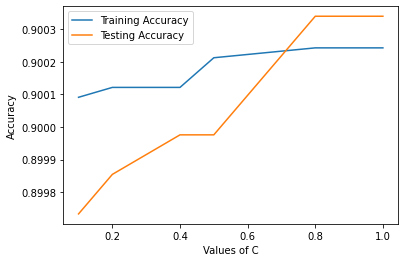

In [109]:
plt.plot(C_values, training_accuracy, label = "Training Accuracy")
plt.plot(C_values, testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracy")
plt.show()



- The model can be said to generalise well but its reliability will be confirmed using classification report after tuning hyperparameters. 

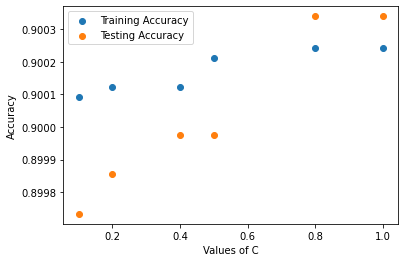

In [110]:
plt.scatter(C_values, training_accuracy, label = "Training Accuracy")
plt.scatter(C_values, testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracy")
plt.show()


- The model can be said to generalise well but its reliability will be confirmed using classification report after tuning hyperparameters. 

In [111]:
#Tuning hyperparameter (C and penalty) to check for better performance of the model

C_values = [0.1, 0.2, 0.4, 0.5, 0.8, 1.0]

training_accuracy, testing_accuracy = [],[]

for value in C_values:
    training_logreg, testing_logreg = modelling(LogisticRegression(C = value, penalty = "l1", solver = "liblinear"))
    training_accuracy.append(training_logreg)
    testing_accuracy.append(testing_logreg)

In [112]:
training_accuracy

[0.9002427921092564,
 0.9001213960546283,
 0.9003034901365705,
 0.9003034901365705,
 0.9001820940819424,
 0.9001517450682853]

In [113]:
testing_accuracy

[0.8998543335761107,
 0.9002184996358339,
 0.9004612770089827,
 0.9003398883224083,
 0.9003398883224083,
 0.9003398883224083]

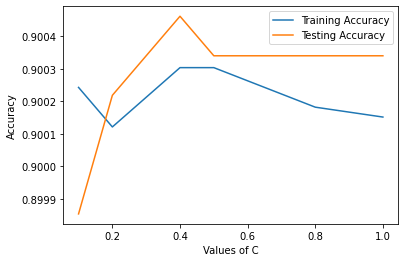

In [114]:
plt.plot(C_values, training_accuracy, label = "Training Accuracy")
plt.plot(C_values, testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracy")
plt.show()


- The above still generalises well. However, its reliability will be tested using the classification report

In [115]:
# Isolate the highest value of C in the hyperparameter

training_logreg1, testing_logreg1 = modelling(LogisticRegression(C = 0.4, penalty = "l1", solver = "liblinear"))

In [116]:
training_logreg1, testing_logreg1

(0.9003034901365705, 0.9004612770089827)

- The training and validation accuracies achieved after tuning the hyperparameter are almost same as the previous accuracies

# Logistic Regression Prediction

In [117]:
# Create an instance of the model
logreg = (LogisticRegression(C = 0.4, penalty = "l1", solver = "liblinear"))

#fit model
logreg.fit(X_train_norm, y_train)

#make prediction
prediction = logreg.predict(X_test_norm)

In [118]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Confusion Matrix

- A confusion matrix also called error matrix is a technique for measuring performance of a Machine learning classification.
The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is
composed of squares:

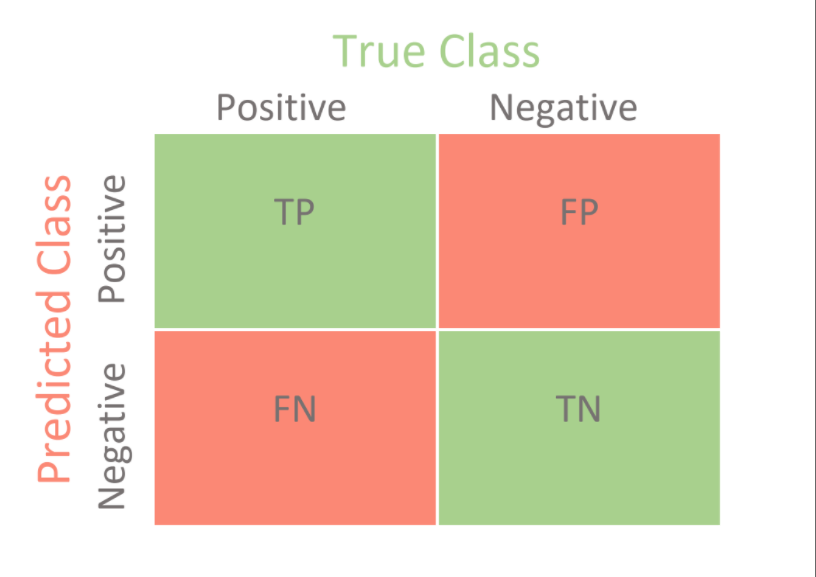
source: bryanshalloway.com

- TP: True Positive: Predicted values correctly predicted as actual positive
- FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive
- FN: False Negative: Positive values predicted as negative
- TN: True Negative: Predicted values correctly predicted as an actual negative

In [119]:
#Using the confusion matrix to reveal the performance of our classification model

#Accuracy is the total number of correct predictions
#Accuracy = (TP + TN)/(TP + FP + FN + TN)

#Recall is the proportion of correctly identified positive inputs
#Recall = TP/(TP + FN)

#Precision is the correctly predicted positive cases
#Precision = TP/(TP + FP) how many customers truly took loan out of all that the model predicted

# F1 score is the weighted mean of the precision and recall.
# F1 = (2 x P x R)/(P + R)

#import confusion matrix and classification report functions
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report


#make predictions on the test data

predictions = logreg.predict(X_test_norm)


#apply the confusion matrix function
confusion = confusion_matrix(y_test, predictions)
confusion

array([[7233,   86],
       [ 734,  185]], dtype=int64)

In [120]:
#Generate Classification report
class_report = classification_report(y_test, predictions)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.68      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [121]:
recall =recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
fscore = f1_score(y_test, predictions)


In [122]:
precision, recall

(0.6826568265682657, 0.20130576713819368)

In [123]:
fscore

0.3109243697478991

In [124]:
# only 20% of customers who took loan were correctly predicted by the model(recall)
# of all customers predicted to apply for loan, only 68% of them actually did(precision)

In [125]:
#features = df_bankdata.drop(["y"], axis=1)
#target = df_bankdata["y"]
#target.value_counts()

# Logistic Regression2

In [126]:
# use a function to get the features and target
def get_data(df_bankdata, target_res):
    df_bankdata = pd.read_csv("df_bankdata.csv")
    
    features_res = df_bankdata.drop(target_res, axis = 1).values
    label = df_bankdata[target_res].values
    
    #Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features_res, label, test_size = 0.2, random_state = 0)
    
    #Normalise the data
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    return X_train_norm, X_test_norm, y_train, y_test
    
    

In [127]:
X_train_norm, X_test_norm, y_train, y_test = get_data(df_bankdata, "y")

In [128]:
#write a function to model the data and create an instance of the model
def modelling(model_name):
    
    model = model_name
    
    #train the model
    model.fit(X_train_norm, y_train)
    
    #get the training and testing accuracy
    training_accuracy = model.score(X_train_norm, y_train)
    testing_accuracy = model.score(X_test_norm, y_test)
    
    return training_accuracy, testing_accuracy
    

In [129]:
#call the function
training_accuracy, testing_accuracy = modelling(LogisticRegression())

In [130]:
Logreg2_training_accuracy, Logreg2_testing_accuracy

(0.9002427921092564, 0.9003398883224083)

- the above accuracies are same as the initial derived 

In [131]:
#Prediction

In [132]:
# Create an instance of the model
logreg2 = (LogisticRegression(C = 0.4, penalty = "l1", solver = "liblinear"))

#fit model
logreg2.fit(X_train_norm, y_train)

#make prediction
prediction2 = logreg2.predict(X_test_norm)

In [133]:
prediction2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
#Confusion Matrix

In [135]:
#Using the confusion matrix to reveal the performance of our classification model

#Accuracy = (TP + TN)/(TP + FP + FN + TN)

#Recall = TP/(TP + FN)

#Precision = TP/(TP + FP) how many customers truly took loan out of all that the model predicted

# F1 = (2 x P x R)/(P + R) 

#import confusion matrix and classification report functions
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report


#make predictions on the test data

predictions2 = logreg2.predict(X_test_norm)


#apply the confusion matrix function
confusion2 = confusion_matrix(y_test, predictions2)
confusion2

array([[7232,   87],
       [ 734,  185]], dtype=int64)

In [136]:
recall =recall_score(y_test, predictions2)
precision = precision_score(y_test, predictions2)
fscore = f1_score(y_test, predictions2)


In [137]:
precision, recall

(0.6801470588235294, 0.20130576713819368)

In [138]:
fscore

0.3106633081444164

- Almost the same precision, recall and Fscore was achieved from the 2nd Logistic regression model prediction.
We shall try the KNN model next.

# K-Nearest Neighbour

- K Nearest Neighbor (KNN) is a non-parametric method used for supervised learning. It is also one of the best-known
classification algorithms. The principle is such that a target label is associated with the features and data are arranged
in a space defined by the selected features. 
When a new data is supplied to the algorithm, the algorithm will compare the classes of the k closest data to determine
the class of the new data. It however considers and stores the nearest points in the training set only.



In [139]:
#import and load libraries
import pandas as pd
import numpy as np


In [140]:
bankdata = pd.read_csv("./df_bankdata.csv")
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0


In [141]:
#check the shape
bankdata.shape

(41188, 20)

In [142]:
#split the data into training and testing sets

features = bankdata.drop("loan", axis = 1).values
target = bankdata.loan.values
    
    

In [143]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train_norm, X_test_norm, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 0)
    

In [144]:
#Normalise the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_norm)
X_test_norm = scaler.transform(X_test_norm)
    

In [145]:
#Build the model
from sklearn.neighbors import KNeighborsClassifier

#instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=1)

#fit the model
knn.fit(X_train_norm, y_train)

#get the accuracy
print("Train accuracy: {:.3f}".format(knn.score(X_train_norm, y_train)))
print("Test accuracy: {:.3f}".format(knn.score(X_test_norm, y_test)))
   

Train accuracy: 0.988
Test accuracy: 0.740


- The KNN model achieved a test or validation accuracy of 74%.
Next, i will examine the classification report to see the precision, recall and fscore of the model

In [146]:
#Model still overfits

# KNN Model Prediction

In [147]:
#Create an instance of the model

knn = KNeighborsClassifier(n_neighbors=1)

#fit the model
knn.fit(X_train_norm,y_train)

#make prediction on first model dataset
prediction = knn.predict(X_train_norm)

In [148]:
prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

- Confusion Matrix

In [149]:
#import confusion matrix and classification report functions
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report


#make predictions on the test data

predictions = knn.predict(X_test_norm)


#apply the confusion matrix function
confusion = confusion_matrix(y_test, predictions)
confusion

array([[2942,  526],
       [ 543,  108]], dtype=int64)

In [150]:
#Generate Classification report
class_report = classification_report(y_test, predictions)

print("Classification report: \n{}".format(class_report))


Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3468
           1       0.17      0.17      0.17       651

    accuracy                           0.74      4119
   macro avg       0.51      0.51      0.51      4119
weighted avg       0.74      0.74      0.74      4119



In [151]:
recall =recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
fscore = f1_score(y_test, predictions)


In [152]:
precision, recall

(0.17034700315457413, 0.16589861751152074)

In [153]:
fscore

0.1680933852140078

- We shall try using the default number of neighbors

In [154]:
# Let us try to instantiate n_neighbors as default (5)

knn1 = KNeighborsClassifier(n_neighbors=5)

#fit the model
knn1.fit(X_train_norm, y_train)

#get the accuracy
print("Train accuracy: {:.3f}".format(knn1.score(X_train_norm, y_train)))
print("Test accuracy: {:.3f}".format(knn1.score(X_test_norm, y_test)))
   

Train accuracy: 0.853
Test accuracy: 0.822


- Here the 2nd model KNN1 gave a validation accuracy of 82.2%, obviosly better than using 1 neighbor.
Next, i will examine the prediction and generate the precision, recall and F1 score.

In [155]:
# Let us try to instantiate n_neighbors as default (5)

knn1 = KNeighborsClassifier(n_neighbors=5)

#fit the model
knn1.fit(X_train_norm, y_train)

#make prediction on second model dataset
prediction1 = knn1.predict(X_train_norm)

In [156]:
prediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Confusion Matrix

In [157]:
#import confusion matrix and classification report functions
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report


#make predictions on the test data

prediction1 = knn.predict(X_test_norm)


#apply the confusion matrix function
confusion = confusion_matrix(y_test, prediction1)
confusion

array([[2942,  526],
       [ 543,  108]], dtype=int64)

In [158]:
#Generate Classification report
class_report = classification_report(y_test, prediction1)

print("Classification report: \n{}".format(class_report))


Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3468
           1       0.17      0.17      0.17       651

    accuracy                           0.74      4119
   macro avg       0.51      0.51      0.51      4119
weighted avg       0.74      0.74      0.74      4119



In [159]:
recall =recall_score(y_test, prediction1)
precision = precision_score(y_test, prediction1)
fscore = f1_score(y_test, prediction1)


In [160]:
precision, recall

(0.17034700315457413, 0.16589861751152074)

In [161]:
fscore

0.1680933852140078

# Decision Tree

- Decision tree classification model learns how to best split the dataset into smaller and smaller subsets to
predict the target value. The condition, or test, is represented as the “leaf” or node while the possible outcomes
as “branches” or edges. This splitting process continues until no further gain can be made 
or a preset rule is attained, e.g. if the maximum depth of the tree is reached.

In [162]:
#Load libraries
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [163]:
bankdata = pd.read_csv("./df_bankdata.csv")
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0


In [164]:
bankdata.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [165]:
import matplotlib.pyplot as plt

In [166]:
# use a function to get the features and target
def get_data(bankdata, target):
    bankdata = pd.read_csv("bankdata.csv")
    
    features = bankdata.drop(target, axis = 1).values
    label = bankdata[target].values
    
    #Split the data into training and test sets
    X_train_norm, X_test_norm, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0)
    

In [167]:
#Create Decision Tree classifier object

cbdata = DecisionTreeClassifier()

#train Decision Tree Classifier
cbdata = cbdata.fit(X_train_norm, y_train)

#predict the response for the test dataset
y_pred = cbdata.predict(X_test_norm)

In [168]:
#get the model accuracy
#print("Train accuracy: {:.3f}".format(cbdata.score(X_train_norm, y_train)))
#print("Test accuracy: {:.3f}".format(cbdata.score(X_test_norm, y_test)))
   

In [169]:
#Check model accuracy

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7322165574168488


- an accuracy rate of 73.22%, considered good. We will check the classification report for its reliability

# Visualizing Decision Tree

In [171]:
!pip install graphviz

In [172]:
!pip install pydotplus

In [173]:
def get_data(bankdata, target):
    bankdata = pd.read_csv("bankdata.csv")
    
    features = bankdata.drop(target, axis = 1).values
    label = bankdata[target].values
    
    #Split the data into training and test sets
    X_train_norm, X_test_norm, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0)
    

In [174]:
#fit classifier

cbdata = tree.DecisionTreeClassifier()

#train Decision Tree Classifier
#cbdata = cbdata.fit(X_train_norm, y_train)
cbdata.fit(X_train_norm, y_train)

DecisionTreeClassifier()

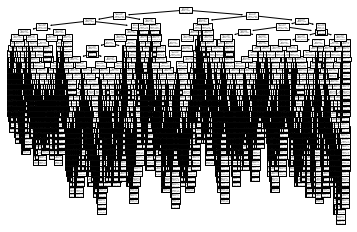

In [175]:
tree.plot_tree(cbdata);

# Decision Tree feature importance

- Feature importance is calculated as the decrease in node impurity weighted by the probability
of reaching that node. The node probability can be determined by the number of samples
that reach the node, divided by the total number of samples. 
- The higher the value the more important the feature.

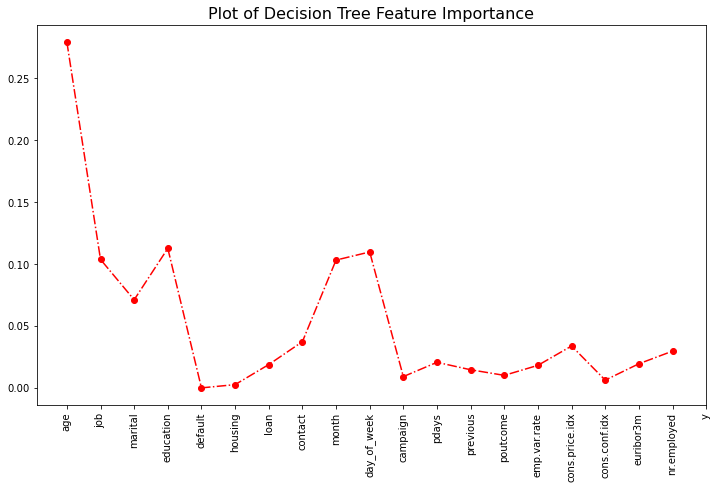

In [176]:
#Plot Decision tree importance

plt.figure(figsize=(12,7))
plt.plot(cbdata.feature_importances_, marker = 'o', linestyle = 'dashdot', color = "r")
plt.xticks(range(bankdata.shape[1]), bankdata, rotation=90)
plt.title("Plot of Decision Tree Feature Importance", loc = 'center', fontsize = 16)
plt.show()

- We can infer from the above plot that age is the most important feature of this decision tree.

# Confusion Matrix

In [177]:
#import confusion matrix and classification report functions
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report


#make predictions on the test data

predictions = cbdata.predict(X_test_norm)


#apply the confusion matrix function
confusion = confusion_matrix(y_test, predictions)
confusion

array([[2891,  577],
       [ 528,  123]], dtype=int64)

In [178]:
#Generate Classification report
class_report = classification_report(y_test, predictions)

print("Classification report: \n{}".format(class_report))


Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3468
           1       0.18      0.19      0.18       651

    accuracy                           0.73      4119
   macro avg       0.51      0.51      0.51      4119
weighted avg       0.74      0.73      0.74      4119



In [179]:
recall =recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
fscore = f1_score(y_test, predictions)


In [180]:
recall

0.1889400921658986

In [181]:
precision

0.1757142857142857

In [182]:
fscore

0.18208734270910437

# Random Forest Model

- Random forest, another supervised machine learning algorithm is a collection of prediction trees.
Every tree depends on random vectors sampled independently, with similar distribution with 
every other tree in the random forest.

In [183]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
#Load data

bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0


In [185]:
#Putting feature variable to X
X = bankdata.drop('y', axis = 1)

#Putting target variable as y
y = bankdata['y']

#split data into train and test sets
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 0)
    
X_train_norm.shape, X_test_norm.shape

((8237, 19), (32951, 19))

In [186]:
#import RandomForestClassifier and fit data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth=5,
                                      n_estimators=100, oob_score=True)

#train the Forest tree classifier
rf.fit(X_train_norm, y_train)

#get the accuracy
print("RF Training accuracy: {:.3f}".format(rf.score(X_train_norm, y_train)))
print("RF Validation accuracy: {:.3f}".format(rf.score(X_test_norm, y_test)))
   

RF Training accuracy: 0.906
RF Validation accuracy: 0.899


- A validation accuracy of 89.9% was attained but model overfits.

In [187]:
#predict the response for the test dataset
rf_prediction = rf.predict(X_test_norm)

#apply the confusion matrix function
confusion = confusion_matrix(y_test, rf_prediction)
confusion

array([[28920,   288],
       [ 3052,   691]], dtype=int64)

In [188]:
#Generate Classification report

class_report = classification_report(y_test, rf_prediction)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     29208
           1       0.71      0.18      0.29      3743

    accuracy                           0.90     32951
   macro avg       0.81      0.59      0.62     32951
weighted avg       0.88      0.90      0.87     32951



In [189]:
#Get the precision, recall and F1 score
rf_precision = precision_score(y_test, rf_prediction)
rf_recall =recall_score(y_test, rf_prediction)
rf_fscore = f1_score(y_test, rf_prediction)

print("Random forest precision score: {:.3f}".format(rf_precision))
print("Random forest recall score: {:.3f}".format(rf_recall))
print("Random forest f1 score: {:.3f}".format(rf_fscore))   


Random forest precision score: 0.706
Random forest recall score: 0.185
Random forest f1 score: 0.293


In [190]:
%%time
rf.fit(X_train_norm, y_train)

Wall time: 352 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=0)

In [191]:
#checking the Out of Bag (oob) score
rf.oob_score_

0.9025130508680345

In [192]:
#Tune hyperparameter using GridSearchCV and fit data

In [193]:
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [194]:
parameters = {'max_depth': [2,3,5,10,20],
             'min_samples_leaf': [5,10,20,50,100,200],
             'n_estimators': [10,25,30,50,100,200]
             }

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
#instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv = 4, n_jobs =-1, verbose=1, scoring = "accuracy")

In [197]:
%%time
grid_search.fit(X_train_norm, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 52.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [198]:
grid_search.best_score_

0.9032421007464271

In [199]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=0)

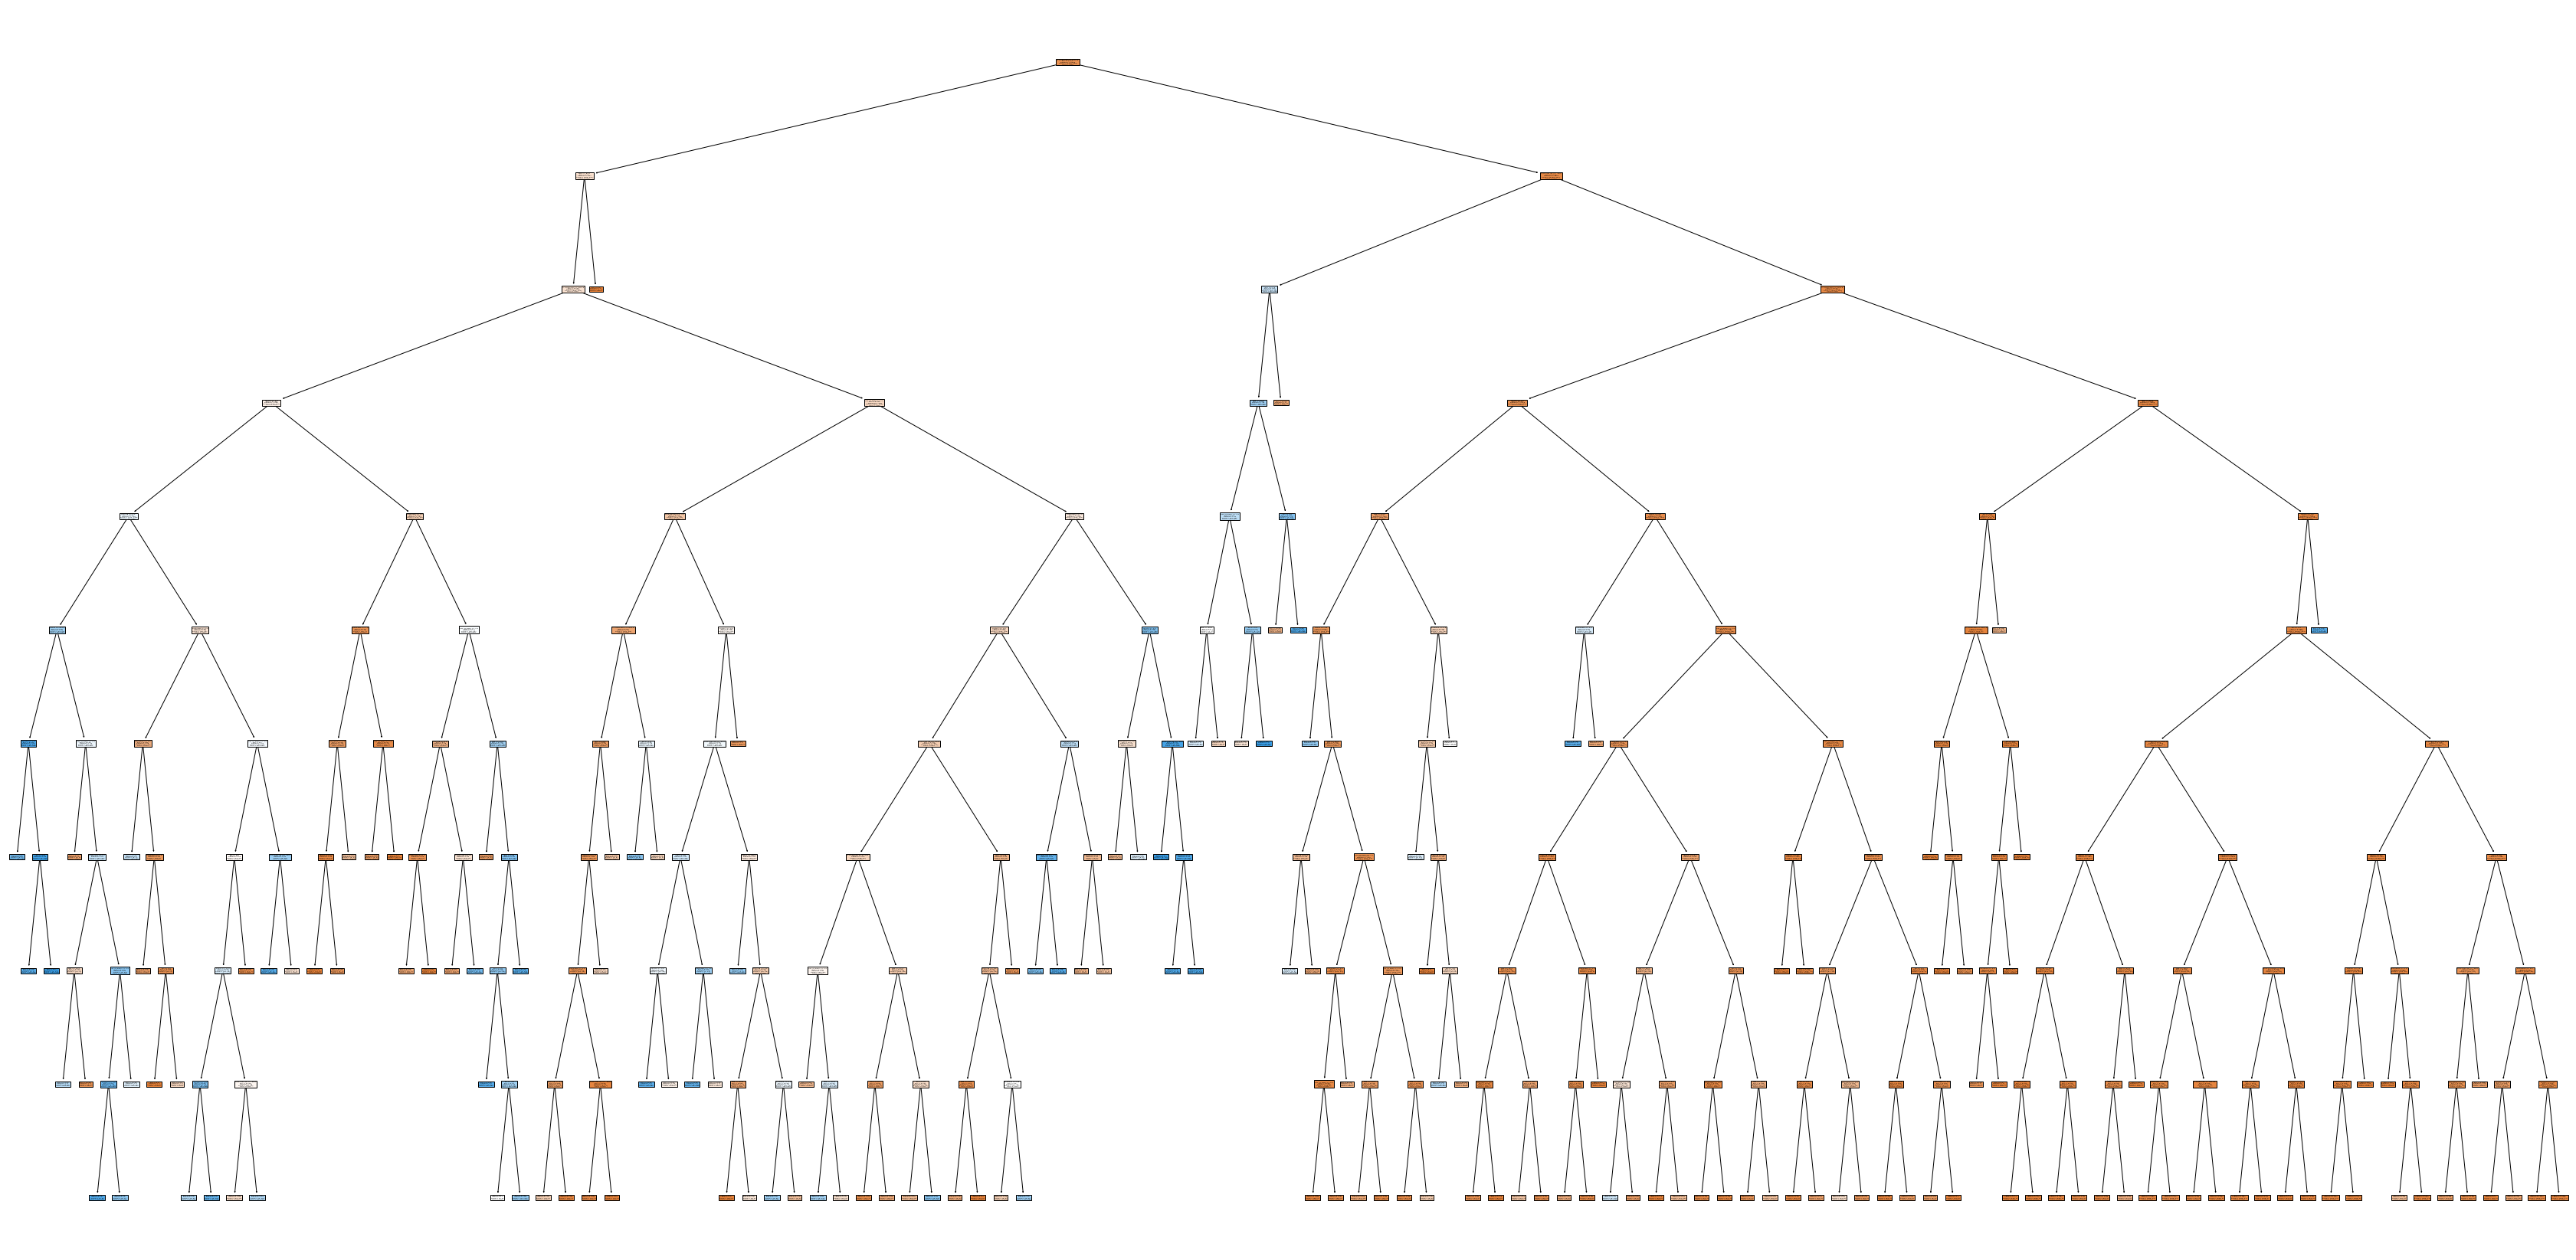

In [200]:
#The best set of parameters are identified above
#We can now visualize

from sklearn.tree import plot_tree
plt.figure(figsize = (60,30))
plot_tree(rf_best.estimators_[20], feature_names = X.columns,class_names=['Loan','No Loan'],filled=True);

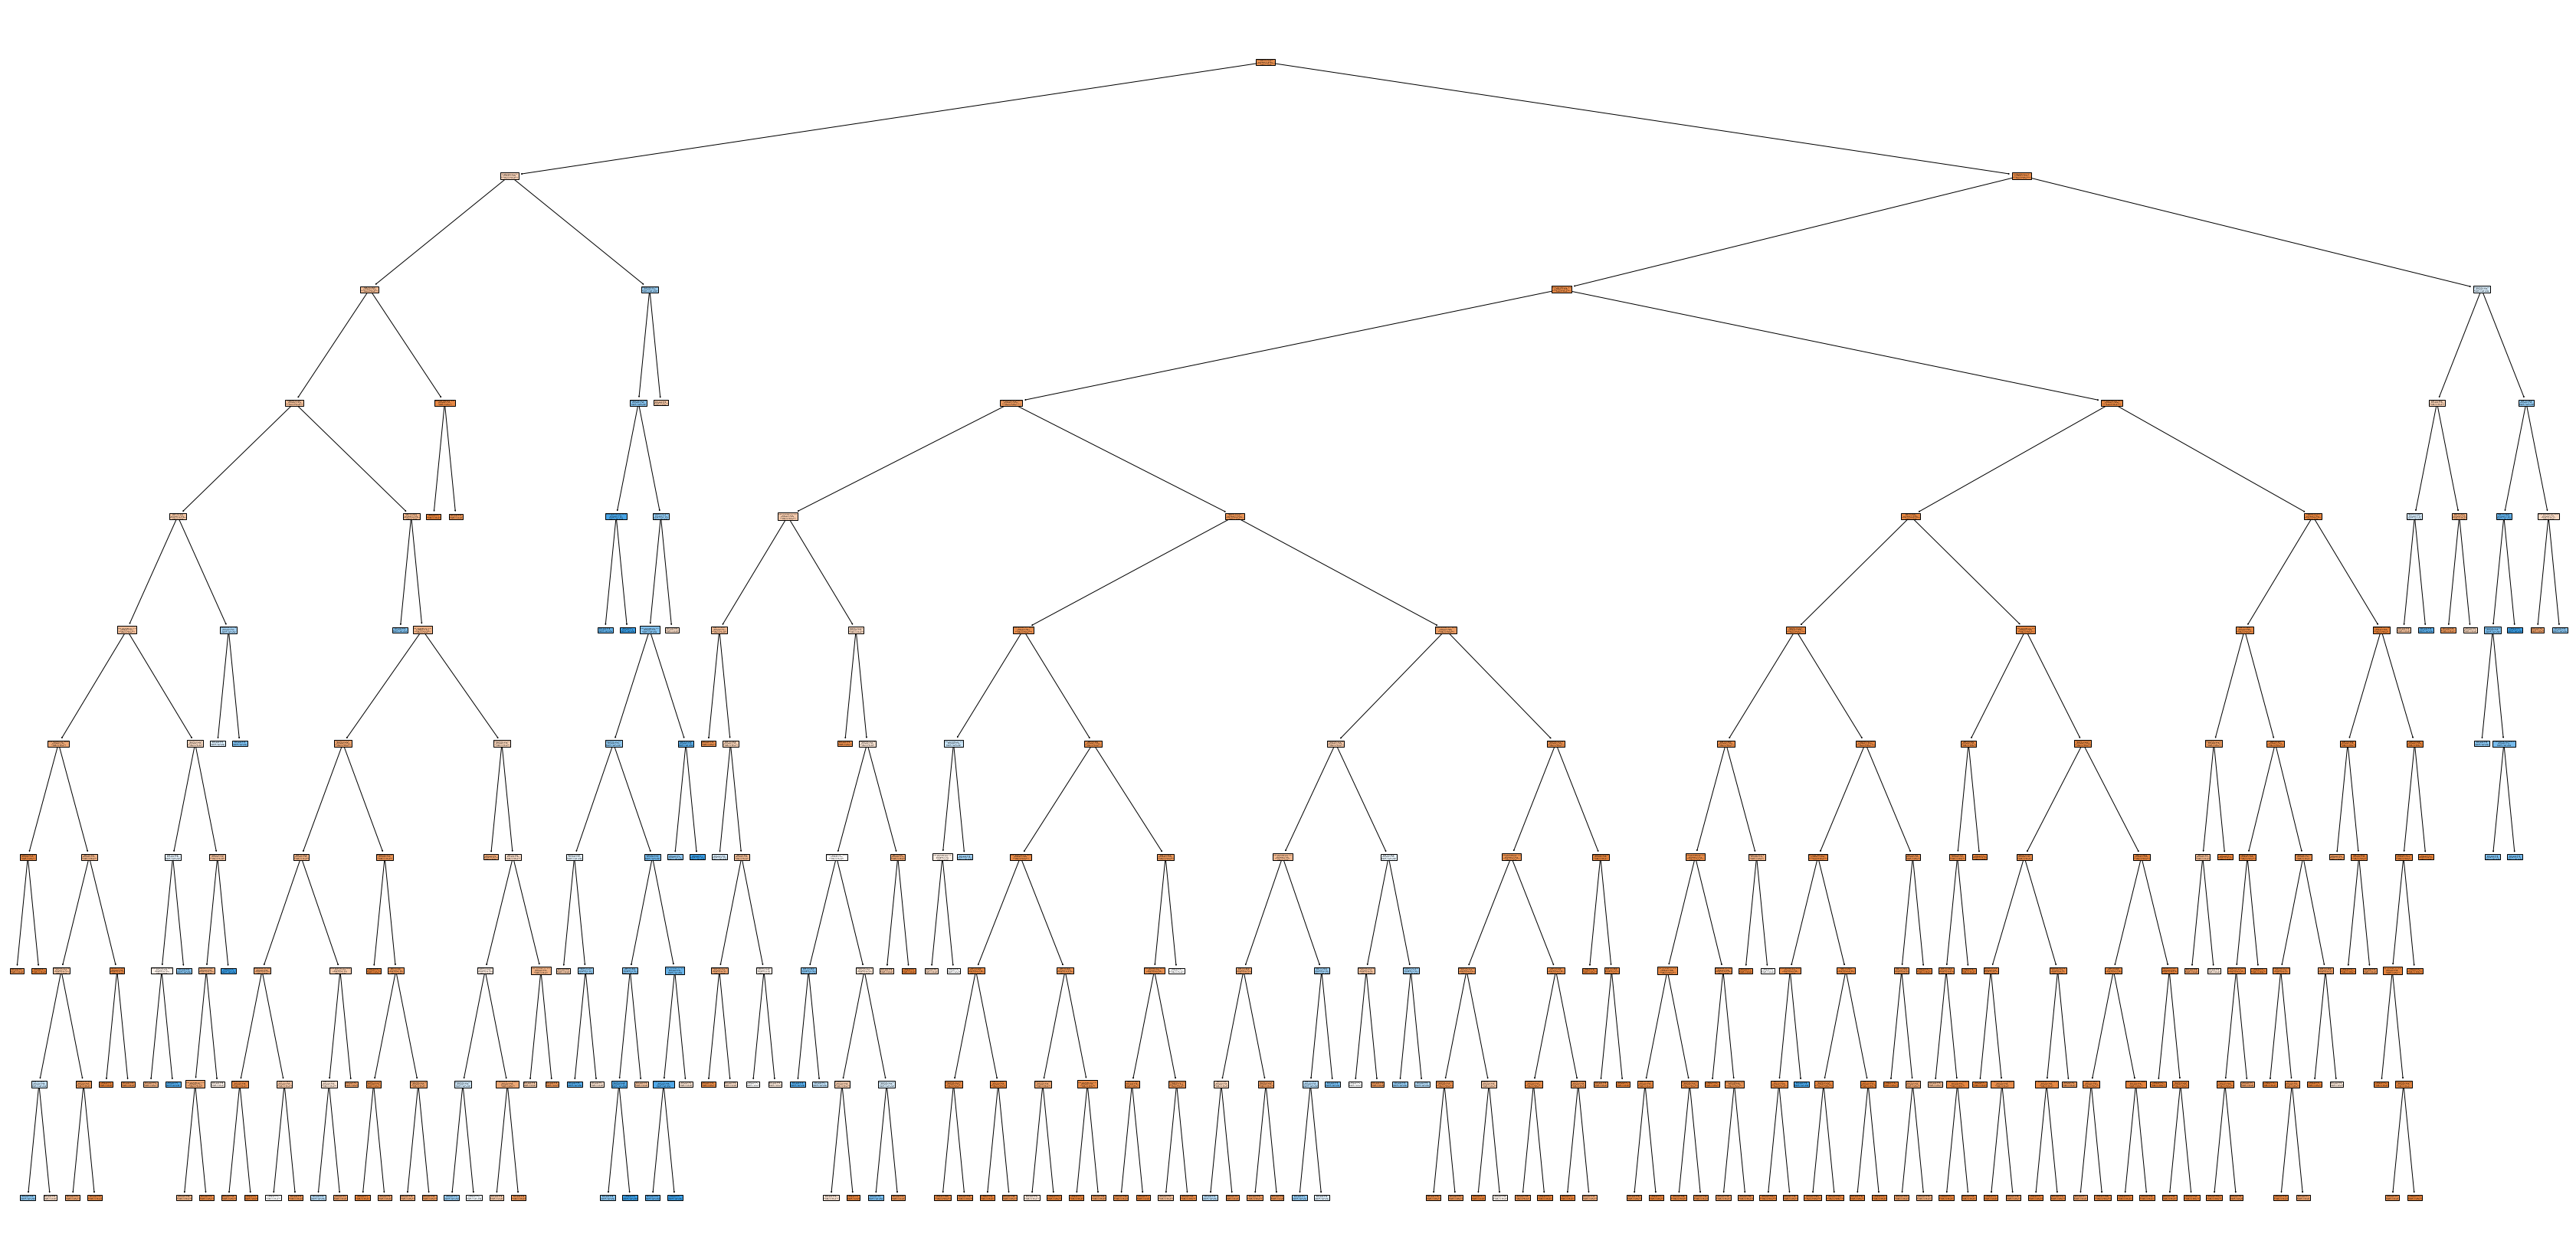

In [201]:
# from sklearn.tree import plot_tree
plt.figure(figsize = (60,30))
plot_tree(rf_best.estimators_[50], feature_names = X.columns,class_names=['Loan','No Loan'],filled=True);

In [202]:
#Sort data with feature importance
rf_best.feature_importances_

array([0.08595721, 0.040082  , 0.01507555, 0.03202051, 0.        ,
       0.01494877, 0.00764172, 0.01195978, 0.05704227, 0.03782846,
       0.03484778, 0.10971527, 0.02473516, 0.10731174, 0.05052202,
       0.01760565, 0.0834006 , 0.07291187, 0.19639364])

In [204]:
importances_bankdata = pd.DataFrame({"Variablename": X_train_norm.columns,
                            "Importances": rf_best.feature_importances_
                                    })

In [205]:
importances_bankdata.sort_values(by="Importances", ascending=False)

,Variablename,Importances
18,nr.employed,0.196394
11,pdays,0.109715
13,poutcome,0.107312
0,age,0.085957
16,cons.conf.idx,0.083401
17,euribor3m,0.072912
8,month,0.057042
14,emp.var.rate,0.050522
1,job,0.040082
9,day_of_week,0.037828


- The feature importance shows that the variable nr.employed has the highest importance while default has the least

# Deep Learning

In [206]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [207]:
%matplotlib inline

In [208]:
#define neural network

model = Sequential()
model.add(Dense(64, input_dim = 19, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [209]:
#Compile the model

model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])


In [210]:
# we train the model
from sklearn.model_selection import train_test_split


history = model.fit(X_train_norm, y_train,
batch_size=32,
epochs=10,
validation_split=0.1,
validation_data=(X_test_norm, y_test))
score = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
232/232 [==============================] - 1s 2ms/step - loss: 6.0454 - accuracy: 0.8296 - val_loss: 17.1455 - val_accuracy: 0.8859
Epoch 2/10
232/232 [==============================] - 0s 1ms/step - loss: 4.1239 - accuracy: 0.8300 - val_loss: 4.5122 - val_accuracy: 0.8956
Epoch 3/10
232/232 [==============================] - 0s 2ms/step - loss: 2.7211 - accuracy: 0.8345 - val_loss: 0.9109 - val_accuracy: 0.8956
Epoch 4/10
232/232 [==============================] - 0s 1ms/step - loss: 3.3406 - accuracy: 0.8294 - val_loss: 2.6260 - val_accuracy: 0.8859
Epoch 5/10
232/232 [==============================] - 0s 2ms/step - loss: 2.4367 - accuracy: 0.8306 - val_loss: 1.1473 - val_accuracy: 0.8956
Epoch 6/10
232/232 [==============================] - 0s 2ms/step - loss: 1.7773 - accuracy: 0.8393 - val_loss: 2.2911 - val_accuracy: 0.8956
Epoch 7/10
232/232 [==============================] - 0s 2ms/step - loss: 2.2418 - accuracy: 0.8388 - val_loss: 2.1400 - val_accuracy: 0.8956
Epoch

- With a deep learning training accuracy of 84.16% and validation accuracy of 88.59%, model generalises well.
Like other model however, its reliability will be put to test using the classification report.

# Balancing the data

In [217]:
#Check for imbalanced data using the target variable (y)
bankdata.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [218]:
features = bankdata.drop(["y"], axis=1)
target = bankdata["y"]
target.value_counts()

0    36548
1     4640
Name: y, dtype: int64

<AxesSubplot:ylabel='y'>

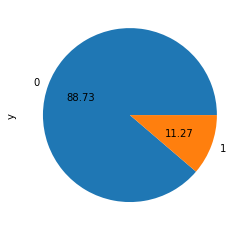

In [213]:
#Visualize class distribution of imbalanced dataset

target.value_counts().plot.pie(autopct='%.2f')

- Building classification models on data that has largely imbalanced classes can be difficult.
- Using techniques such as oversampling, undersampling, resampling combinations, and custom filtering can improve accuracy.

In [215]:
!pip install imbalanced-learn

In [219]:
bankdata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,1,999,0,1,-1,94,-50,1,4963,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1,94,-50,1,4963,0
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1,94,-50,1,4963,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1,94,-50,1,4963,1


# Random Oversampling

- Oversampling resamples all classes except the majority class.
- It does this by creating synthetic additional data points for the class with fewer data points, the minority class.

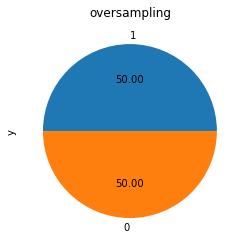

In [220]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler
ros = RandomOverSampler(sampling_strategy="minority")
features_res, target_res = ros.fit_resample(features, target)
#X_res, y_res = ros.fit_resample(X, y)

ax = target_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("oversampling")

- The new data now shows an even distribution of classes (50% defaulted vs. 50% not defaulted).

In [221]:
#Check classification distribution
target_res.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [222]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

features_smote, target_smote = smote.fit_resample(features, target)

print("Initial target shape: {}".format(Counter(target)))
print("Resampled target shape: {}".format(Counter(target_smote)))

Initial target shape: Counter({0: 36548, 1: 4640})
Resampled target shape: Counter({0: 36548, 1: 36548})


- At this stage after balancing the data, we need to re-prepare the dataset using the "train_test_split"

In [223]:
#Load libraries for splitting data and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Split the data into training_validation and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(features_smote, target_smote, test_size = 0.2, random_state = 0)

#Split the training_val into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, train_size = 0.2, random_state = 0)
    

In [224]:
#Instantiate the scaler
scaler = StandardScaler()

#scale the training, validation and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

- We will now try to build the previous models again using the balanced dataset

# Logistic Regression - (Post balanced data)

In [225]:
from sklearn.linear_model import LogisticRegression
#def modelling(model_name):
    
    #model = model_name
    
    #Instantiate the Logistic Regression model
logreg_bal = LogisticRegression(random_state = 0)

logreg_bal.fit(X_train_scaled, y_train)
    
    #train the model
    #model.fit(X_train_scaled, y_train)
    
    #get the training and testing accuracy
    #training_accuracy = model.score(X_train_scaled, y_train)
    #validation_accuracy = model.score(X_valid_scaled, y_valid)
    
    #return training_accuracy, validation_accuracy
print("Training accuracy: {:.3f}".format(logreg_bal.score(X_train_scaled, y_train)))
print("Validation accuracy: {:.3f}".format(logreg_bal.score(X_valid_scaled, y_valid)))

Training accuracy: 0.769
Validation accuracy: 0.765


In [226]:
#make predictions on the test data
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report

logreg_bal_predictions = logreg_bal.predict(X_test_scaled)


#apply the confusion matrix function
confusion = confusion_matrix(y_test, logreg_bal_predictions)
confusion

array([[5815, 1387],
       [2018, 5400]], dtype=int64)

In [227]:
#Generate Classification report

class_report = classification_report(y_test, logreg_bal_predictions)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      7202
           1       0.80      0.73      0.76      7418

    accuracy                           0.77     14620
   macro avg       0.77      0.77      0.77     14620
weighted avg       0.77      0.77      0.77     14620



In [228]:
#Get the precision, recall and F1 score
logreg_bal_recall =recall_score(y_test, logreg_bal_predictions)
logreg_bal_precision = precision_score(y_test, logreg_bal_predictions)
logreg_bal_fscore = f1_score(y_test, logreg_bal_predictions)

print("Logistic Regression balanced precision score: {:.3f}".format(logreg_bal_precision))
print("Logistic Regression balanced recall score: {:.3f}".format(logreg_bal_recall))
print("Logistic Regression balanced f1 score: {:.3f}".format(logreg_bal_fscore))   


Logistic Regression balanced precision score: 0.796
Logistic Regression balanced recall score: 0.728
Logistic Regression balanced f1 score: 0.760


# K Nearest Neighbor -KNN (Post balanced data)

- We will try to the KNN classification model with the balanced dataset and compare its accuracy, precision, 
recall, and F1 score.

In [229]:
#Load the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report

#instantiate the classifier
knn_bal = KNeighborsClassifier(n_neighbors=1) #Applying 1 neighbor

#fit the model
knn_bal.fit(X_train_scaled, y_train)

#get the accuracy
print("Training accuracy: {:.3f}".format(knn_bal.score(X_train_scaled, y_train)))
print("Validation accuracy: {:.3f}".format(knn_bal.score(X_valid_scaled, y_valid)))
   

Training accuracy: 0.996
Validation accuracy: 0.790


- Although the model overfits, we achieved a validation accuracy of 79.0%

# Precision, recall and F1 score (New KNN Model)

In [230]:
#Make prediction
knn_bal_prediction = knn_bal.predict(X_test_scaled)

#apply the confusion matrix function
confusion = confusion_matrix(y_test, knn_bal_prediction)
confusion


array([[5464, 1738],
       [1219, 6199]], dtype=int64)

In [231]:
#Generate Classification report

class_report = classification_report(y_test, knn_bal_prediction)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      7202
           1       0.78      0.84      0.81      7418

    accuracy                           0.80     14620
   macro avg       0.80      0.80      0.80     14620
weighted avg       0.80      0.80      0.80     14620



In [232]:
#Get the precision, recall and F1 score
knn_bal_recall =recall_score(y_test, knn_bal_prediction)
knn_bal_precision = precision_score(y_test, knn_bal_prediction)
knn_bal_fscore = f1_score(y_test, knn_bal_prediction)

print("KNN (balanced) precision score: {:.3f}".format(knn_bal_precision))
print("KNN (balanced) recall score: {:.3f}".format(knn_bal_recall))
print("KNN (balanced) f1 score: {:.3f}".format(knn_bal_fscore))   


KNN (balanced) precision score: 0.781
KNN (balanced) recall score: 0.836
KNN (balanced) f1 score: 0.807


- Next, i will examine the KNN1 model using the default number of neigbors

In [233]:
#Load the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report

#instantiate the classifier
knn1_bal = KNeighborsClassifier(n_neighbors=5) #default number of neighbors

#fit the model
knn1_bal.fit(X_train_scaled, y_train)

#get the accuracy
print("Training accuracy: {:.3f}".format(knn1_bal.score(X_train_scaled, y_train)))
print("Validation accuracy: {:.3f}".format(knn1_bal.score(X_valid_scaled, y_valid)))
   

Training accuracy: 0.848
Validation accuracy: 0.784


- The model still overfits with a vaildation accuracy of 78.4%

# Precision, Recall and F1 score for KNN1

In [234]:
#Make prediction
knn1_bal_prediction = knn1_bal.predict(X_test_scaled)

#apply the confusion matrix function
confusion = confusion_matrix(y_test, knn1_bal_prediction)
confusion


array([[5520, 1682],
       [1477, 5941]], dtype=int64)

In [235]:
#Generate Classification report

class_report = classification_report(y_test, knn1_bal_prediction)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7202
           1       0.78      0.80      0.79      7418

    accuracy                           0.78     14620
   macro avg       0.78      0.78      0.78     14620
weighted avg       0.78      0.78      0.78     14620



In [236]:
#Get the precision, recall and F1 score
knn1_bal_recall =recall_score(y_test, knn1_bal_prediction)
knn1_bal_precision = precision_score(y_test, knn1_bal_prediction)
knn1_bal_fscore = f1_score(y_test, knn1_bal_prediction)

print("KNN1 (balanced) precision score: {:.3f}".format(knn1_bal_precision))
print("KNN1 (balanced) recall score: {:.3f}".format(knn1_bal_recall))
print("KNN1 (balanced) f1 score: {:.3f}".format(knn1_bal_fscore))   


KNN1 (balanced) precision score: 0.779
KNN1 (balanced) recall score: 0.801
KNN1 (balanced) f1 score: 0.790


# Decision Tree (Post balanced data)

In [237]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifier object
cbdata_bal = DecisionTreeClassifier(random_state = 0)

#train Decision Tree Classifier
cbdata_bal = cbdata.fit(X_train_scaled, y_train)

#get the accuracy
print("Training accuracy: {:.3f}".format(cbdata_bal.score(X_train_scaled, y_train)))
print("Validation accuracy: {:.3f}".format(cbdata_bal.score(X_valid_scaled, y_valid)))
   

Training accuracy: 0.995
Validation accuracy: 0.788


- Model overfits with validation accuracy of 78.8%

# Precision, recall and F1 Score (New Decision Tree Model)

In [238]:
#predict the response for the test dataset
cbdata_bal_prediction = cbdata_bal.predict(X_test)

#apply the confusion matrix function
confusion = confusion_matrix(y_test, cbdata_bal_prediction)
confusion

C:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[3033, 4169],
       [2685, 4733]], dtype=int64)

In [239]:
#Generate Classification report

class_report = classification_report(y_test, cbdata_bal_prediction)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.53      0.42      0.47      7202
           1       0.53      0.64      0.58      7418

    accuracy                           0.53     14620
   macro avg       0.53      0.53      0.52     14620
weighted avg       0.53      0.53      0.53     14620



In [240]:
#Get the precision, recall and F1 score
cbdata_bal_precision = precision_score(y_test, cbdata_bal_prediction)
cbdata_bal_recall =recall_score(y_test, cbdata_bal_prediction)
cbdata_bal_fscore = f1_score(y_test, cbdata_bal_prediction)

print("Decision tree (balanced) precision score: {:.3f}".format(cbdata_bal_precision))
print("Decision tree (balanced) recall score: {:.3f}".format(cbdata_bal_recall))
print("Decision tree (balanced) f1 score: {:.3f}".format(cbdata_bal_fscore))   


Decision tree (balanced) precision score: 0.532
Decision tree (balanced) recall score: 0.638
Decision tree (balanced) f1 score: 0.580


- we achieved very low precision of 53.2%, recall of 63.8% and F1 score of 58.0%.
Let us move to the Random forest model.

# Random Forest (post balanced data)

In [241]:
#import RandomForestClassifier and fit data
from sklearn.ensemble import RandomForestClassifier

rf_bal = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth=5,
                                      n_estimators=100, oob_score=True)

#train the Forest tree classifier
rf_bal.fit(X_train_scaled, y_train)

#get the accuracy
print("RF Training accuracy: {:.3f}".format(rf_bal.score(X_train_scaled, y_train)))
print("RF Validation accuracy: {:.3f}".format(rf_bal.score(X_valid_scaled, y_valid)))
   

RF Training accuracy: 0.755
RF Validation accuracy: 0.753


- Here, we achieved a validation accuracy of 75.3%

# Precision, Recall and F1 score (New Forest tree model)

In [242]:
#predict the response for the test dataset
rf_bal_prediction = rf_bal.predict(X_test)

#apply the confusion matrix function
confusion = confusion_matrix(y_test, rf_bal_prediction)
confusion

C:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[7132,   70],
       [6107, 1311]], dtype=int64)

In [243]:
#Generate Classification report

class_report = classification_report(y_test, rf_bal_prediction)

print("Classification report: \n{}".format(class_report))

Classification report: 
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      7202
           1       0.95      0.18      0.30      7418

    accuracy                           0.58     14620
   macro avg       0.74      0.58      0.50     14620
weighted avg       0.75      0.58      0.49     14620



In [244]:
#Get the precision, recall and F1 score
rf_bal_precision = precision_score(y_test, rf_bal_prediction)
rf_bal_recall =recall_score(y_test, rf_bal_prediction)
rf_bal_fscore = f1_score(y_test, rf_bal_prediction)

print("Random forest (balanced) precision score: {:.3f}".format(rf_bal_precision))
print("Random forest (balanced) recall score: {:.3f}".format(rf_bal_recall))
print("Random forest (balanced) f1 score: {:.3f}".format(rf_bal_fscore))   


Random forest (balanced) precision score: 0.949
Random forest (balanced) recall score: 0.177
Random forest (balanced) f1 score: 0.298


# Deep Learning (Post balanced data)

In [245]:
#define neural network

model = Sequential()
model.add(Dense(64, input_dim = 19, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1280      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [246]:
#Compile the model

model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])


In [247]:
# we train the model
from sklearn.model_selection import train_test_split


history_bal = model.fit(X_train_scaled, y_train,
batch_size=32,
epochs=10,
validation_split=0.1,
validation_data=(X_test_scaled, y_test))

score = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
329/329 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7576 - val_loss: 0.5001 - val_accuracy: 0.7436
Epoch 2/10
329/329 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7835 - val_loss: 0.4911 - val_accuracy: 0.7530
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7867 - val_loss: 0.4855 - val_accuracy: 0.7470
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.7884 - val_loss: 0.4949 - val_accuracy: 0.7462
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.7938 - val_loss: 0.4776 - val_accuracy: 0.7573
Epoch 6/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.7930 - val_loss: 0.4872 - val_accuracy: 0.7487
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.7932 - val_loss: 0.4706 - val_accuracy: 0.7547
Epoch 

- Model overfits! This performance is worse than that achieved with the uneven data

- Summary of Models

- Having tested the different metrics on our models first with imbalanced dataset 
and later with balanced dataset, we shall show a comparism of the models achieved.

# - Summary and comparism of model performances on imbalanced data

In [249]:
data = {"Models": ["Logreg", "Logreg1", "KNN", "KNN1", "DecisionTree", "RandomForest"],
       "Test_accuracy": [90.0, 90.1, 74.0, 82.2, 72.9, 89.9 ],
       "Precision": [68.3, 68.0, 17.0, 17.0, 17.6, 70.6],
       "Recall": [20.1, 20.1, 16.6, 16.6, 18.9, 18.5],
       "F1score": [31.0, 31.0, 16.8, 16.8,18.2, 29.3]}
model_comparism = pd.DataFrame(data = data)

model_comparism

,Models,Test_accuracy,Precision,Recall,F1score
0,Logreg,90.0,68.3,20.1,31.0
1,Logreg1,90.1,68.0,20.1,31.0
2,KNN,74.0,17.0,16.6,16.8
3,KNN1,82.2,17.0,16.6,16.8
4,DecisionTree,72.9,17.6,18.9,18.2
5,RandomForest,89.9,70.6,18.5,29.3


# Summary and comparism of model performances on balanced data

In [250]:
import pandas as pd
data2 = {"Models": ["Logreg", "KNN", "KNN1", "DecisionTree", "RandomForest"],
       "Test_accuracy": [76.5, 79.0, 78.4, 78.8, 75.3 ],
       "Precision": [79.6, 78.1, 77.9, 53.2, 94.9 ],
       "Recall": [72.8, 83.6, 80.1, 63.8, 17.7 ],
       "F1score": [76.0, 80.7, 79.0, 58.0, 29.8]}
model_comparism2 = pd.DataFrame(data = data2)

model_comparism2

,Models,Test_accuracy,Precision,Recall,F1score
0,Logreg,76.5,79.6,72.8,76.0
1,KNN,79.0,78.1,83.6,80.7
2,KNN1,78.4,77.9,80.1,79.0
3,DecisionTree,78.8,53.2,63.8,58.0
4,RandomForest,75.3,94.9,17.7,29.8


# Conclusion and recommendation

 - The goal of this project is to build a predictive model to predict whether a bank customer will subscribe
to a term deposit or not. We have investigated the correlation between the variables and identified their relationships
to have a clearer picture of the data. Different classification models were built and examined both with the uneven data
and, after balancing the data. We established that Machine learning model performances can be made better and more reliable
when data is balanced. Furthermore, we can infer from the summary of the models achieved based on F1 scores of this project
that KNN is our best model with KNN & KNN1 of 80.7% and 79.0% respectively.

